# Exploratory Data Analysis
# Supermarket sales

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [2]:
# Loading the dataset
df = pd.read_csv('C:/Users/FILI DANI/Desktop/Machine Learning/supermarket_sales - Sheet1.csv')

In [3]:
# Chencking the dataset
print(df.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

Data Cleaning

In [4]:
# Removing unwanted features
df = df.drop(columns=['Invoice ID'])

In [5]:
# Extracting year,month and day
df['Date'] = pd.to_datetime(df['Date'],format='%m/%d/%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day_name()

In [6]:
# Extracting hour from time column
df['Hour within purchase'] = df['Time'].str.split(':').map(lambda x:x[0])
df['Hour within purchase'] = df['Hour within purchase'].astype(int)

Analysis

In [8]:
# Retrieving mean, mode and median of numerical data
mean = []
median = []
mode = []
variance = []
columns = ['Unit price','Quantity','Tax 5%','Total','Year','Hour within purchase','cogs','gross margin percentage',
           'gross income','Rating']
for col in columns:
    mean.append(df[col].mean())
    median.append(df[col].median())
    mode.append(df[col].mode())  
    variance.append(df[col].var())
print(mean)
print(median)
print(mode)
print(variance)

[55.67212999999998, 5.51, 15.379369000000002, 322.96674900000005, 2019.0, 14.91, 307.58738000000034, 4.761904762000062, 15.379369000000002, 6.972700000000003]
[55.230000000000004, 5.0, 12.088000000000001, 253.848, 2019.0, 15.0, 241.76, 4.761904762, 12.088000000000001, 7.0]
[0    83.77
Name: Unit price, dtype: float64, 0    10
Name: Quantity, dtype: int64, 0     4.1540
1     4.4640
2     8.3770
3     9.0045
4    10.3260
5    10.3635
6    12.5700
7    13.1880
8    22.4280
9    39.4800
Name: Tax 5%, dtype: float64, 0     87.2340
1     93.7440
2    175.9170
3    189.0945
4    216.8460
5    217.6335
6    263.9700
7    276.9480
8    470.9880
9    829.0800
Name: Total, dtype: float64, 0    2019
Name: Year, dtype: int64, 0    19
Name: Hour within purchase, dtype: int32, 0     83.08
1     89.28
2    167.54
3    180.09
4    206.52
5    207.27
6    251.40
7    263.76
8    448.56
9    789.60
Name: cogs, dtype: float64, 0    4.761905
Name: gross margin percentage, dtype: float64, 0     4.1540
1    

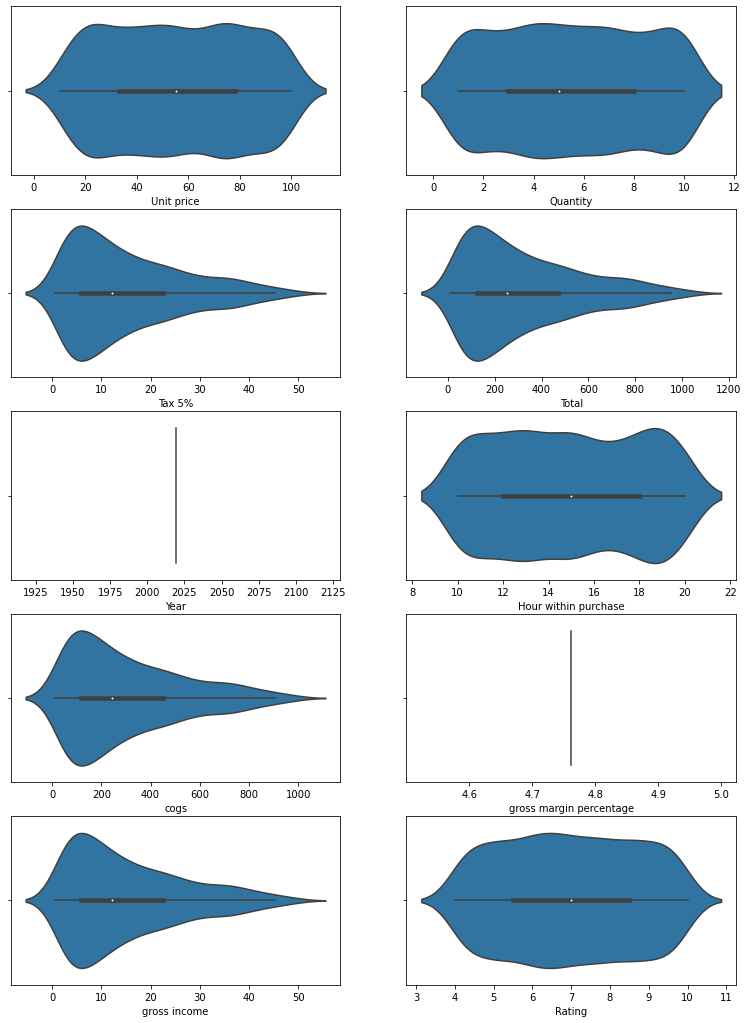

In [9]:
# Visualizing the distributions for numerical data
fig , ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10)) = plt.subplots(5,2,figsize=(13,18))
sns.violinplot(data=df,x='Unit price',ax=ax1)
sns.violinplot(data=df,x='Quantity',ax=ax2)
sns.violinplot(data=df,x='Tax 5%',ax=ax3)
sns.violinplot(data=df,x='Total',ax=ax4)
sns.violinplot(data=df,x='Year',ax=ax5)
sns.violinplot(data=df,x='Hour within purchase',ax=ax6)
sns.violinplot(data=df,x='cogs',ax=ax7)
sns.violinplot(data=df,x='gross margin percentage',ax=ax8)
sns.violinplot(data=df,x='gross income',ax=ax9)
sns.violinplot(data=df,x='Rating',ax=ax10)
plt.show()

In [10]:
# Retrieving mode for categorical data
mode = []
columns = ['Branch','City','Customer type','Gender','Product line','Payment','Month','Day']
for col in columns:
    mode.append(df[col].mode())
print(mode)

[0    A
Name: Branch, dtype: object, 0    Yangon
Name: City, dtype: object, 0    Member
Name: Customer type, dtype: object, 0    Female
Name: Gender, dtype: object, 0    Fashion accessories
Name: Product line, dtype: object, 0    Ewallet
Name: Payment, dtype: object, 0    January
Name: Month, dtype: object, 0    Saturday
Name: Day, dtype: object]


                          Unit price    Quantity       Tax 5%         Total  \
Unit price                701.965331    0.834778   196.668340   4130.035142   
Quantity                    0.834778    8.546446    24.149570    507.140978   
Tax 5%                    196.668340   24.149570   137.096594   2879.028477   
Total                    4130.035142  507.140978  2879.028477  60459.598018   
Year                        0.000000    0.000000     0.000000      0.000000   
Hour within purchase        0.695928   -0.068168    -0.103377     -2.170921   
cogs                     3933.366802  482.991408  2741.931883  57580.569541   
gross margin percentage     0.000000    0.000000     0.000000      0.000000   
gross income              196.668340   24.149570   137.096594   2879.028477   
Rating                     -0.399668   -0.079456    -0.733300    -15.399306   

                         Year  Hour within purchase          cogs  \
Unit price                0.0              0.695928   3933.36

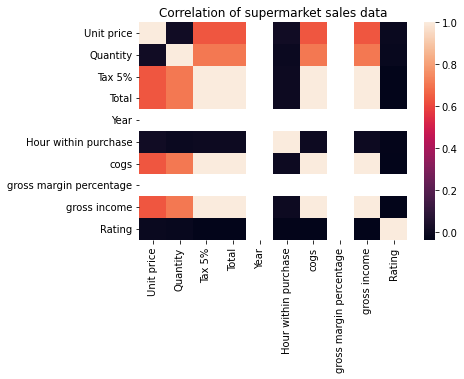

In [11]:
# Computing covariance and correlation 
covariance = df[['Unit price','Quantity','Tax 5%','Total','Year','Hour within purchase','cogs','gross margin percentage',
           'gross income','Rating']].cov()
correlation = df[['Unit price','Quantity','Tax 5%','Total','Year','Hour within purchase','cogs','gross margin percentage',
           'gross income','Rating']].corr()
print(covariance)
fig , ax1 = plt.subplots()
sns.heatmap(correlation,ax=ax1)
ax1.set_title('Correlation of supermarket sales data')
plt.show()

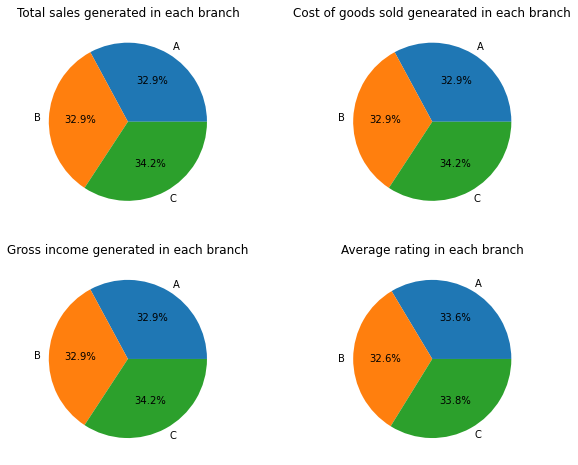

In [12]:
#The geneartion of total sales, cogs and gross income in each branch as well as the average rating in each branch
branch_total = df.groupby('Branch')['Total'].sum()
branch_cogs = df.groupby('Branch')['cogs'].sum()
branch_gross_income = df.groupby('Branch')['gross income'].sum()
branch_rating = df.groupby('Branch')['Rating'].mean()
fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,8))
ax1.pie(branch_total,labels=['A','B','C'],autopct='%1.1f%%')
ax2.pie(branch_cogs,labels=['A','B','C'],autopct='%1.1f%%')
ax3.pie(branch_gross_income,labels=['A','B','C'],autopct='%1.1f%%')
ax4.pie(branch_rating,labels=['A','B','C'],autopct='%1.1f%%')
ax1.set_title('Total sales generated in each branch')
ax2.set_title('Cost of goods sold genearated in each branch')
ax3.set_title('Gross income generated in each branch')
ax4.set_title('Average rating in each branch')
plt.show()

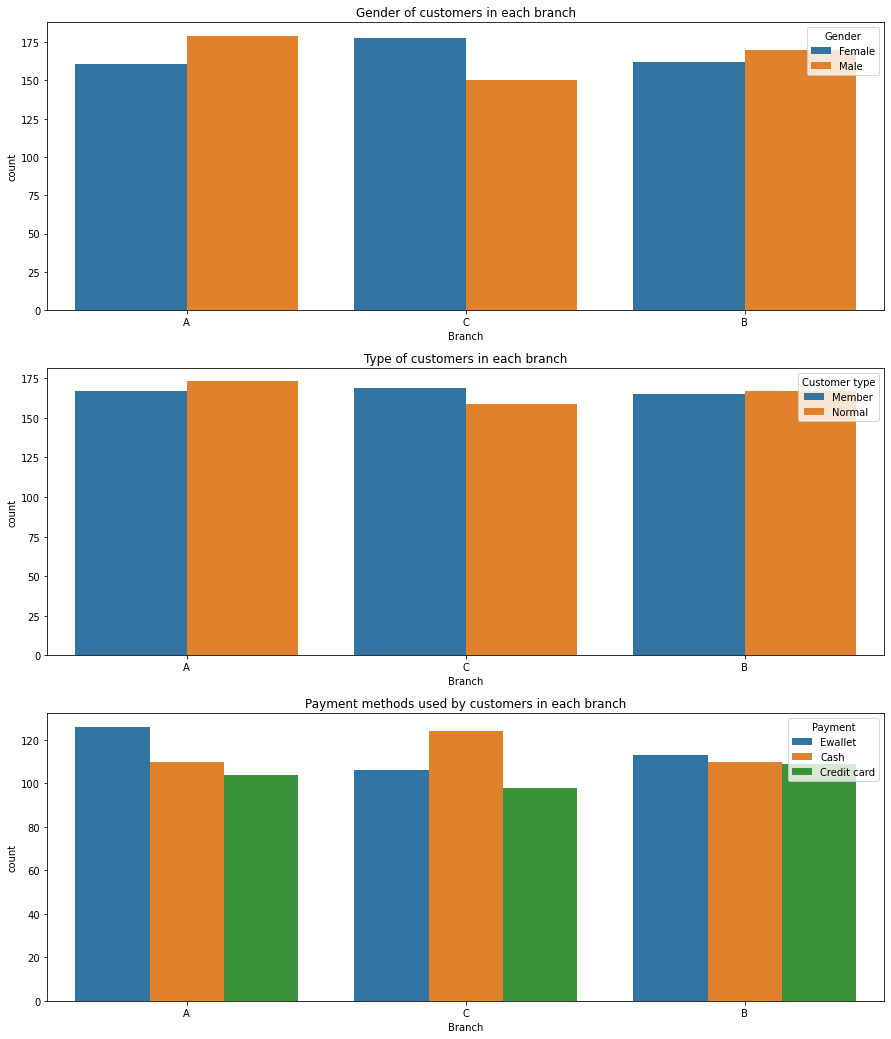

In [13]:
# The proportion customers in terms of gender, customer type and payment method used in each branch
fig , ((ax1),(ax2),(ax3)) = plt.subplots(3,1,figsize=(15,18))
sns.countplot(data=df,x='Branch',hue='Gender',ax=ax1)
sns.countplot(data=df,x='Branch',hue='Customer type',ax=ax2)
sns.countplot(data=df,x='Branch',hue='Payment',ax=ax3)
ax1.set_title('Gender of customers in each branch')
ax2.set_title('Type of customers in each branch')
ax3.set_title('Payment methods used by customers in each branch')
plt.show()

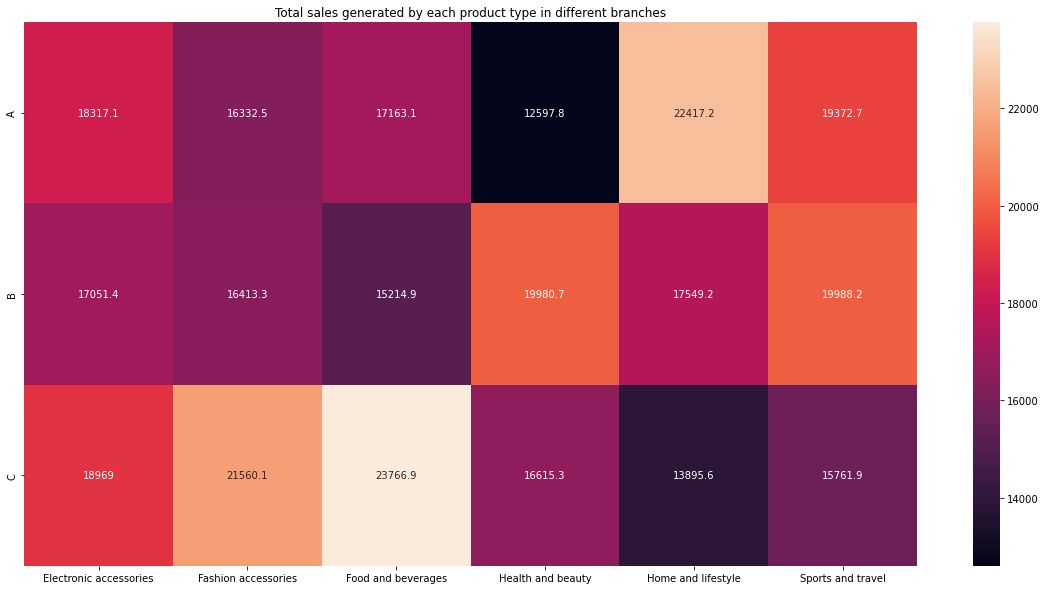

In [14]:
# Total sales of each product type generated in each branch
branch_a = df.groupby(['Branch','Product line'])['Total'].sum()['A']
branch_b = df.groupby(['Branch','Product line'])['Total'].sum()['B']
branch_c = df.groupby(['Branch','Product line'])['Total'].sum()['C']
array_branch = np.array([branch_a,branch_b,branch_c])
labels = ['Electronic accessories','Fashion accessories','Food and beverages','Health and beauty','Home and lifestyle',
          'Sports and travel']
fig , ax = plt.subplots(figsize=(20,10))
sns.heatmap(array_branch,annot=True,ax=ax,fmt='.6g')
ax.set_title('Total sales generated by each product type in different branches')
ax.set(xticklabels=labels)
ax.set_yticklabels(['A','B','C'])
plt.show()

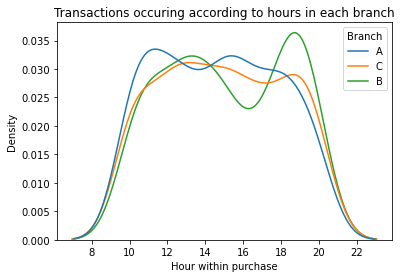

In [15]:
# Frequency of transactions occuring in different hour intervals according to each branch
fig , ax = plt.subplots()
sns.kdeplot(data=df,x='Hour within purchase',hue='Branch',ax=ax)
ax.set_title('Transactions occuring according to hours in each branch')
plt.show()

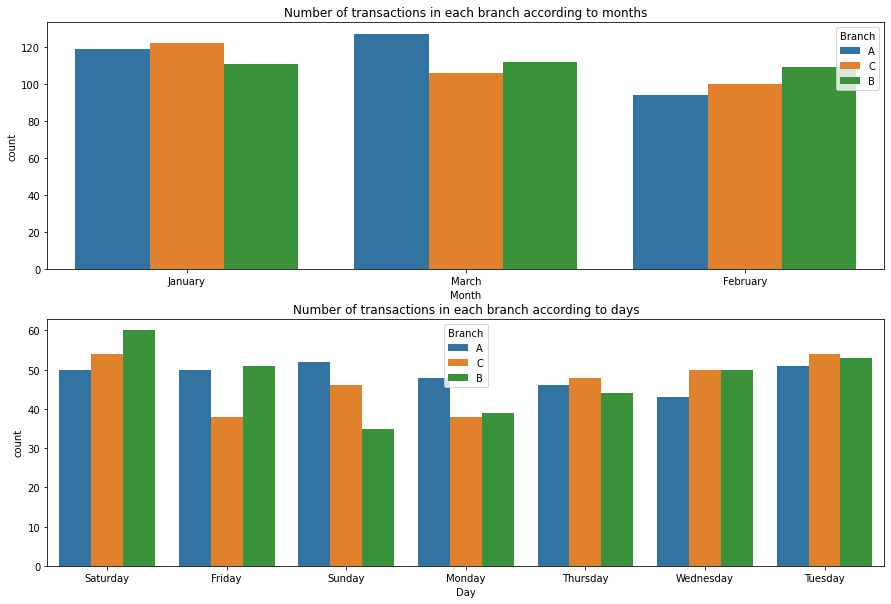

In [16]:
# Number of transactions occuring in each branch according to days and months
fig , ((ax1),(ax2)) = plt.subplots(2,1,figsize=(15,10))
sns.countplot(data=df,x='Month',hue='Branch',ax=ax1)
sns.countplot(data=df,x='Day',hue='Branch',ax=ax2)
ax1.set_title('Number of transactions in each branch according to months')
ax2.set_title('Number of transactions in each branch according to days')
plt.show()